## Observations and Insights 

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_tests = mouse_metadata.merge(study_results, how='outer', on='Mouse ID')

# Display the data table for preview
mouse_tests.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [19]:
# Checking the number of mice.
mice_number = mouse_tests['Mouse ID'].count()
mice_number





1893

In [17]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = mouse_tests.loc[mouse_tests.duplicated(subset=['Mouse ID', 'Timepoint'], keep='first')]                             
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [23]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_tests = mouse_tests.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
mouse_tests.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [25]:
# Checking the number of mice in the clean DataFrame.
mouse_tests['Mouse ID'].count()

1888

## Summary Statistics

In [48]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = mouse_tests.groupby('Drug Regimen').mean()
tumor_mean = mean['Tumor Volume (mm3)']
median = mouse_tests.groupby('Drug Regimen').median()
tumor_median = median['Tumor Volume (mm3)']
var = mouse_tests.groupby('Drug Regimen').var()
tumor_var = var['Tumor Volume (mm3)']
std = mouse_tests.groupby('Drug Regimen').std()
tumor_std = std['Tumor Volume (mm3)']
sem = mouse_tests.groupby('Drug Regimen').sem()
tumor_sem = sem['Tumor Volume (mm3)']
    
mice_df = pd.DataFrame({
    'Mean': tumor_mean,
    'Median': tumor_median,
    'Variance': tumor_var,
    'Standard Deviation': tumor_std,
    'SEM': tumor_sem
})
mice_df





# This method is the most straighforward, creating multiple series and putting them all together at the end.



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [49]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
mouse_tests.groupby('Drug Regimen').agg(
    {
        'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']
    })

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

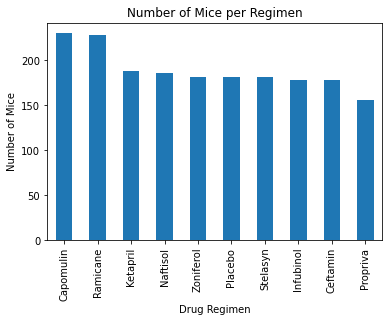

In [62]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_bar_pandas = mouse_tests['Drug Regimen'].value_counts().plot.bar(title='Number of Mice per Regimen')
mouse_bar_pandas.set(xlabel="Drug Regimen", ylabel="Number of Mice")
mouse_bar_pandas

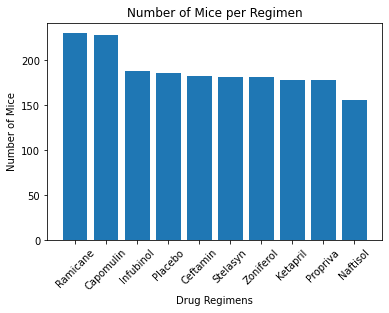

In [67]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x = mouse_tests['Drug Regimen'].unique()
y = mouse_tests['Drug Regimen'].value_counts()
mouse_bar_mpl = plt.bar(x, y)
mouse_bar_mpl = plt.xticks(rotation=45)
mouse_bar_mpl = plt.xlabel('Drug Regimens')
mouse_bar_mpl = plt.ylabel('Number of Mice')
mouse_bar_mpl = plt.title('Number of Mice per Regimen')

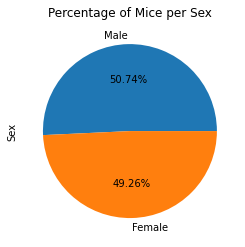

In [80]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
    
mouse_pie_pandas = mouse_tests['Sex'].value_counts().plot(kind='pie', title='Percentage of Mice per Sex', autopct='%.2f%%')
mouse_pie_pandas

([<matplotlib.patches.Wedge at 0x1df94592c18>,
 [Text(-0.025622895044835736, 1.0997015355311284, 'Male'),
  Text(0.025622792083347525, -1.099701537930112, 'Female')],
 [Text(-0.013976124569910401, 0.5998372011987972, '50.74%'),
  Text(0.01397606840909865, -0.5998372025073339, '49.26%')])

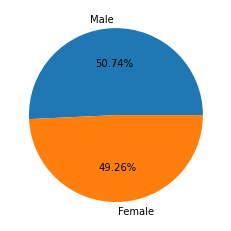

In [103]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
y = mouse_tests['Sex'].value_counts()
labels = ['Male', 'Female']
plt.pie(y, labels=labels, autopct='%.2f%%')


## Quartiles, Outliers and Boxplots

In [105]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
mouse_test_final = mouse_tests.drop_duplicates(subset='Mouse ID', keep='last')

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
cap = mouse_test_final.loc[mouse_test_final['Drug Regimen'] == 'Capomulin']
ram = mouse_test_final.loc[mouse_test_final['Drug Regimen'] == 'Ramicane']
inf = mouse_test_final.loc[mouse_test_final['Drug Regimen'] == 'Infubinol']
cef = mouse_test_final.loc[mouse_test_final['Drug Regimen'] == 'Ceftamin']
treatments_df = pd.concat([cap, ram, inf, cef])
treatments_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
64,f966,Capomulin,Male,16,17,20,30.485985,0
104,u364,Capomulin,Male,18,17,45,31.023923,3
...,...,...,...,...,...,...,...,...
1743,x226,Ceftamin,Male,23,28,0,45.000000,0
1773,x581,Ceftamin,Female,19,28,45,64.634949,3
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1845,y769,Ceftamin,Female,6,27,45,68.594745,4


In [134]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = treatments_df['Drug Regimen'].unique()
treatments

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = treatments_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq  



# Locate the rows which contain mice on each drug and get the tumor volumes
  
    
# add subset 
    
    
# Determine outliers using upper and lower bounds
    

94.04403868375002

[Text(0, 0.5, 'Tumor Volume (mm3)'), Text(0.5, 1.0, '')]

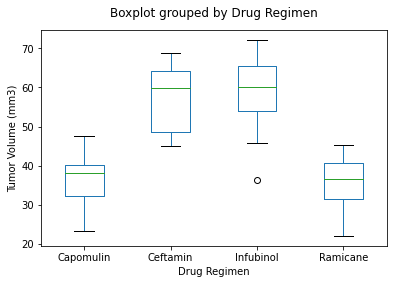

In [118]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
mice_boxplot = treatments_df.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen', grid=False)
mice_boxplot.set(ylabel='Tumor Volume (mm3)', title='')




## Line and Scatter Plots

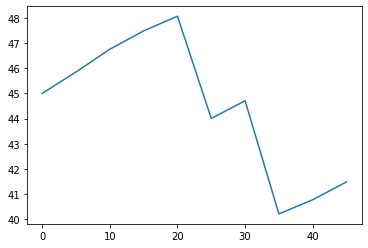

In [138]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

mouse_tests.loc[mouse_tests['Drug Regimen'] == 'Capomulin']
sampleMouse = mouse_tests.loc[mouse_tests['Mouse ID'] == 'l509']
plt.plot(sampleMouse['Timepoint'], sampleMouse['Tumor Volume (mm3)'])
plt.set

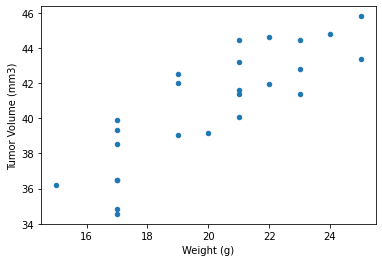

In [136]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capx = mouse_tests.loc[mouse_tests['Drug Regimen'] == 'Capomulin']
cap_mean = capx.groupby('Mouse ID').mean()
plot = cap_mean.plot.scatter('Weight (g)', 'Tumor Volume (mm3)')

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
